# 4.10: Coding Etiquette & Excel Reporting - Part 1

Table of Contents:
    
1. Importing libraries and files

2. Considering security implications

3. Regional segmentation

4. Low-activity customers

5. Customer profiling

6. Visualization

7. Customer profile aggregation for usage frequency and expenditure

8. Comparison of customer profiles between regions and departments with visualization

9. Exporting data in pickle format

In [2]:
# 1. Importing libraries and files

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Path
path = r'C:\Users\GTSA - Infinity\Documents\Analytika career foundry\Task 4 PYTHON\Instacart Basket Analysis'

In [5]:
# Importing pkl 
new_data = pd.read_pickle(os.path.join(path, '02 Original data','Prepared Data', 'orders_products_customers_merged_4_9_1.pkl'))

In [6]:
# Importing csv
wrangled = pd.read_csv(os.path.join(path, '02 Original data', 'Prepared Data', 'departments_wrangled.csv'))

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
# Checking for PII data 
new_data.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_type,median_days_since_prior_order,Customer_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Slowest days,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer


In [8]:
# Removing first_name column
new_data = new_data.drop(columns = ['first_name'])

In [9]:
# Removing last_name column
new_data = new_data.drop(columns = ['last_name'])

In [10]:
# Checking result
new_data.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,User_ID,order_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_type,median_days_since_prior_order,Customer_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,2543867,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,1285508,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,2578584,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,423547,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,2524893,...,Mid-range product,Regularly busy,Slowest days,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer


# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. Hint: You can do this by crossing the variable you just created with the spending flag.

In [11]:
# Creating an empty container
result = []

for value in new_data["state"]:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
      result.append('Region 1, Northeast')
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
      result.append('Region 2, Midwest')
  elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas','Louisiana']:
      result.append('Region 3, South')  
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
      result.append('Region 4, West')
  else:
      result.append('Not Part of USA')

In [12]:
# Creating a new column 'region' and se it equal to 'result'
new_data['region'] = result

In [13]:
# Checking information in 'region' - values
new_data['region'].value_counts(dropna = False)

Region 3, South        10792300
Region 4, West          8293217
Region 2, Midwest       7597585
Region 1, Northeast     5722939
Name: region, dtype: int64

# Creating a crosstab between 'region' and Spender_type (spending flag). The spending flag for each user is based on the average price across all their orders using the following criteria:
- If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
- If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”



In [14]:
crosstab_spending_habits = pd.crosstab(new_data['region'], new_data['Spender_type'], dropna = False)

In [15]:
crosstab_spending_habits

Spender_type,High_spender,Low_spender
region,,
"Region 1, Northeast",108226,5614713
"Region 2, Midwest",155979,7441606
"Region 3, South",209693,10582607
"Region 4, West",160354,8132863


In [16]:
# The South region has the highest amount of low and high spenders. 
# The Northeast region has the lowest amount of low and high spenders. 
# This could be caused by number of states in South region (more states) compared to Northeast region (fewer states).

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Creating an exclusion flag for customers with less than 5 orders (column max_order is indicating number of orders per customer)
new_data.loc[(new_data['max_order'] < 5 ) , 'exclusion_flag'] = 'low activity customer'
new_data.loc[(new_data['max_order'] >= 5 ) , 'exclusion_flag'] = 'high activity customer'

In [18]:
# Checking the new column 
new_data['exclusion_flag'].value_counts(dropna = False)

high activity customer    30965686
low activity customer      1440355
Name: exclusion_flag, dtype: int64

In [19]:
# Creating exclusion subset (a new df for low-activity customers)
new_data_low_activity_cust = new_data[new_data['exclusion_flag']=='low activity customer']

In [20]:
# Exporting the new df for low-acitivity customers
new_data_low_activity_cust.to_pickle(os.path.join(path, '02 Original data','Prepared Data', 'low_activity_customer_subset.pkl'))

In [21]:
# Creating exclusion subset (a new df without the low-activity customers)
new_data_high_activity_cust = new_data[new_data['exclusion_flag']=='high activity customer']

In [22]:
# Checking results
new_data_high_activity_cust['exclusion_flag'].value_counts(dropna = False)

high activity customer    30965686
Name: exclusion_flag, dtype: int64

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [23]:
# Checking wrangled
wrangled

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [24]:
# Renaming column unnamed to department_id
wrangled.rename(columns = {'Unnamed: 0': 'department_id'}, inplace=True)

In [25]:
# Merging df high-activity customers and wrangled on department_id
merge_data = new_data_high_activity_cust.merge(wrangled, on = 'department_id')

In [26]:
# Checking the rows in the merged df
merge_data.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,User_ID,order_id,...,busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_type,median_days_since_prior_order,Customer_frequency,region,exclusion_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,2543867,...,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer,"Region 2, Midwest",high activity customer,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,1285508,...,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer,"Region 2, Midwest",high activity customer,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,26711,2578584,...,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer,"Region 2, Midwest",high activity customer,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,33890,1044841,...,Most orers,12,Regular customer,7.057534,Low_spender,26.0,Non_frequent_customer,"Region 4, West",high activity customer,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,33890,474720,...,Average orders,12,Regular customer,7.057534,Low_spender,26.0,Non_frequent_customer,"Region 4, West",high activity customer,beverages


In [27]:
# Age
merge_data['age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [28]:
# Creating age categories
merge_data.loc[(merge_data['age'] >= 18) & (merge_data['age'] < 25), 'age_category'] = 'Youngest Age'
merge_data.loc[(merge_data['age'] >= 25) & (merge_data['age'] < 35), 'age_category'] = 'Younger Age'
merge_data.loc[(merge_data['age'] >= 35) & (merge_data['age'] < 45), 'age_category'] = 'Young Age'
merge_data.loc[(merge_data['age'] >= 45) & (merge_data['age'] < 55), 'age_category'] = 'Middle Age'
merge_data.loc[(merge_data['age'] >= 55) & (merge_data['age'] < 65), 'age_category'] = 'Older Middle Age'
merge_data.loc[merge_data['age'] >= 65, 'age_category'] = 'Senior'

In [29]:
# Checking the age_category values
merge_data['age_category'].value_counts()

Senior              8195806
Middle Age          4887716
Young Age           4836878
Younger Age         4827279
Older Middle Age    4802689
Youngest Age        3415318
Name: age_category, dtype: int64

In [30]:
# Income
merge_data['income'].describe()

count    3.096569e+07
mean     9.967573e+04
std      4.314168e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [31]:
# Creating income_profile column: Low income < 70K USD, Middle income 70K- 100K USD, Upper mid income 100k-130K, High income > 130K
merge_data.loc[merge_data['income']< 52200, 'income_category'] = 'Low income'
merge_data.loc[(merge_data['income']>= 52200) & (merge_data['income']< 156600), 'income_category'] = 'Middle income'
merge_data.loc[merge_data['income']>= 156600, 'income_category'] = 'Upper income'

In [32]:
# Checking the income_category values
merge_data['income_category'].value_counts()

Middle income    24542216
Low income        3691857
Upper income      2731613
Name: income_category, dtype: int64

In [33]:
# Number of dependents
merge_data['number_of_dependants'].describe()

count    3.096569e+07
mean     1.501815e+00
std      1.118897e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

In [34]:
# Creating number of dependents column
merge_data.loc[merge_data['number_of_dependants'] > 0, 'dependents_category'] = 'With children'
merge_data.loc[merge_data['number_of_dependants'] == 0, 'dependents_category'] = 'Without children'

In [35]:
# Checking the dependents values
merge_data['dependents_category'].value_counts()

With children       23225670
Without children     7740016
Name: dependents_category, dtype: int64

In [36]:
# Certain goods profiling

In [37]:
# Meat buyers
merge_data.loc[merge_data['department'] !='meat seafood', 'meat_buyer'] = 'No_meat_buyer'
merge_data.loc[merge_data['department'] =='meat seafood', 'meat_buyer'] = 'Yes_meat_buyer'

In [38]:
merge_data['meat_buyer'].value_counts(dropna = False)

No_meat_buyer     30290905
Yes_meat_buyer      674781
Name: meat_buyer, dtype: int64

In [39]:
# Pet owners
merge_data.loc[merge_data['department'] !='pets', 'pet_owner'] = 'No_pet_owner'
merge_data.loc[merge_data['department'] =='pets', 'pet_owner'] = 'Yes_pet_owner'

In [40]:
merge_data['pet_owner'].value_counts(dropna = False)

No_pet_owner     30872626
Yes_pet_owner       93060
Name: pet_owner, dtype: int64

In [41]:
 # Parents
merge_data.loc[merge_data['department'] !='babies', 'parent'] = 'No_shopping_babies_dept'
merge_data.loc[merge_data['department'] =='babies', 'parent'] = 'Yes_shopping_babies_dept'

In [42]:
merge_data['parent'].value_counts(dropna = False)

No_shopping_babies_dept     30555294
Yes_shopping_babies_dept      410392
Name: parent, dtype: int64

In [43]:
# Dividing time of day into its own categories: overnight, morning, afternoon, evening, night  
merge_data.loc[(merge_data['order_hour_of_day'] > 0) & (merge_data['order_hour_of_day'] < 6), 'time_of_day'] = 'overnight'
merge_data.loc[(merge_data['order_hour_of_day'] >= 6) & (merge_data['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
merge_data.loc[(merge_data['order_hour_of_day'] >= 12) & (merge_data['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
merge_data.loc[(merge_data['order_hour_of_day'] >= 17) & (merge_data['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
merge_data.loc[(merge_data['order_hour_of_day'] >= 20) & (merge_data['order_hour_of_day'] < 24), 'time_of_day'] = 'night'                                                                        

In [44]:
merge_data['time_of_day'].value_counts()

afternoon    12553109
morning      10431922
evening       4727576
night         2685718
overnight      359302
Name: time_of_day, dtype: int64

In [45]:
# Creating family_crosstab between 'family_status' and 'number_of_dependants'
family_crosstab = pd.crosstab(merge_data['family_status'],merge_data['number_of_dependants'],dropna = False)

In [46]:
# Checking values in family_crosstab
family_crosstab

number_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645371,0,0,0
living with parents and siblings,0,508060,484671,488477
married,0,7211334,7248829,7284299
single,5094645,0,0,0


# 6. Create an appropriate visualization to show the distribution of profiles

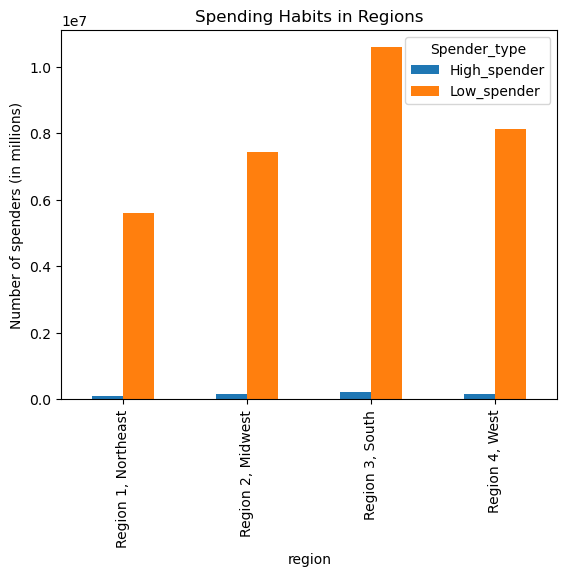

In [47]:
# Visualizing spending habits in regions
spender_type_region=crosstab_spending_habits.plot(kind="bar", title = 'Spending Habits in Regions', ylabel='Number of spenders (in millions)')

In [48]:
# Exporting visualization
spender_type_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_type_habits_region.png'))

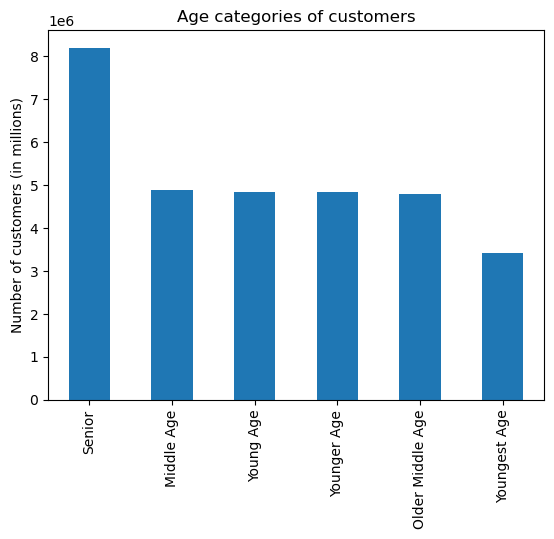

In [49]:
# Visualizing age profile of customers
age_bar = merge_data['age_category'].value_counts().plot.bar(title = 'Age categories of customers', ylabel='Number of customers (in millions)')

In [50]:
# Exporting visualization
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_categories_of_customers.png'))

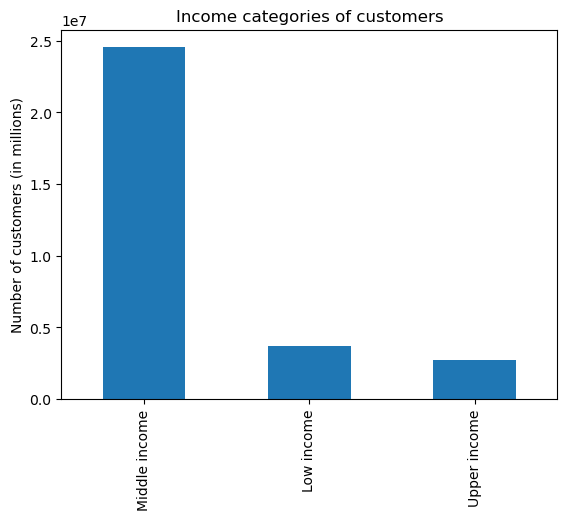

In [51]:
# Visualizing income profile of customers
income_bar = merge_data['income_category'].value_counts().plot.bar(title = 'Income categories of customers', ylabel='Number of customers (in millions)')

In [52]:
# Exporting visualization
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_categories_of_customers.png'))

Text(0.5, 1.0, 'Distribution of Customers with/without Children')

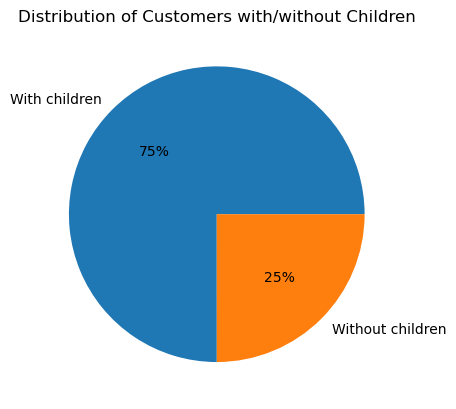

In [53]:
# Visualizing dependets profile of customers
dependents_pie = merge_data['dependents_category'].value_counts().plot.pie(label='', labels = ['With children', 'Without children'], autopct = ('%1.f%%'))
plt.title('Distribution of Customers with/without Children')

In [54]:
# Exporting visualization
dependents_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'number_of_dependents.png'))

Text(0.5, 1.0, 'Distribution of Customers at Meat seafood Department')

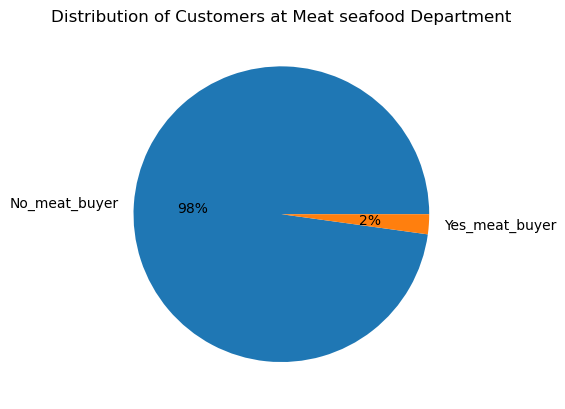

In [55]:
# Visualizing dependets profile of customers
meat_buyers_pie = merge_data['meat_buyer'].value_counts().plot.pie(label='', labels = ['No_meat_buyer', 'Yes_meat_buyer'], autopct = ('%1.f%%'))
plt.title('Distribution of Customers at Meat seafood Department')

In [56]:
# Exporting visualization
meat_buyers_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meat_buyers.png'))

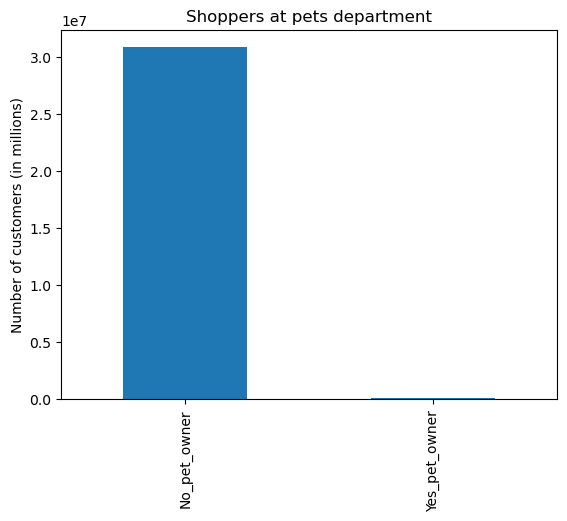

In [57]:
pet_owner_bar = merge_data['pet_owner'].value_counts().plot.bar(title = 'Shoppers at pets department', ylabel='Number of customers (in millions)')

In [58]:
# Exporting visualization
pet_owner_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_owner.png'))

Text(0.5, 1.0, 'Distribution of Customers at Babies Department')

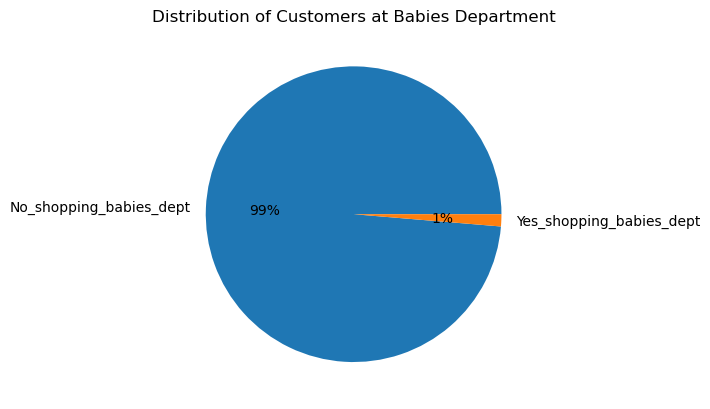

In [59]:
# Visualizing profile of customers shopping at babies department
shopper_babies_depart_pie = merge_data['parent'].value_counts().plot.pie(label='', labels = ['No_shopping_babies_dept', 'Yes_shopping_babies_dept'], autopct = ('%1.f%%'))
plt.title('Distribution of Customers at Babies Department')

In [60]:
# Exporting visualization
shopper_babies_depart_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shopping_at_babies_depart.png'))

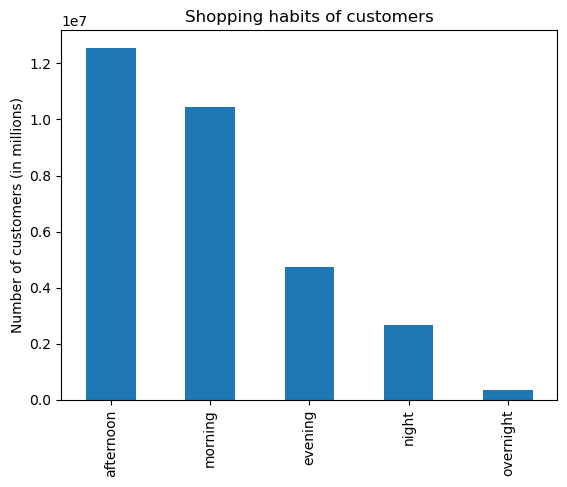

In [61]:
# Visualizing Order_hour_of_day profile of customers
order_time_bar = merge_data['time_of_day'].value_counts().plot.bar(title = 'Shopping habits of customers', ylabel='Number of customers (in millions)')

In [62]:
# Exporting visualization
order_time_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order time categories of customers.png'))

# 7. Customer profile aggregation for usage frequency and expenditure

In [63]:
#  Expenditure aggregation of department and prices
merge_data.groupby('department').agg({'prices':['mean','min','max']})

prices              
                      mean  min      max
department                              
alcohol           8.151446  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.857482  1.0     15.0
beverages         7.682556  1.0     15.0
breakfast         8.029773  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.114599  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.733725  1.0     15.0
household         7.379951  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300034  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014482  1.0     20.0
personal care     7.998489  1.0     15.0
pets              7.887489  1.0     15.0
produce           7.980348  1.0     15.0
snacks            4.275555  1.6      7.0

In [64]:
# Replacing $99,999 price as missing with NaN
merge_data.loc[merge_data['prices'] >100, 'prices'] = np.nan

In [65]:
#Checking the new max value of prices
merge_data['prices'].max()

25.0

In [66]:
# Creating again expenditure aggregation of department and prices
merge_data.groupby('department').agg({'prices':['mean','min','max']})

prices           
                      mean  min   max
department                           
alcohol           8.151446  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.029773  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.336372  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998489  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [67]:
# Applying aggregate function to find max, mean, min of prices per family status
merge_data.groupby('family_status').agg({'prices':['mean','min','max']})

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.801008  1.0  25.0
living with parents and siblings  7.800584  1.0  25.0
married                           7.790245  1.0  25.0
single                            7.783556  1.0  25.0

In [68]:
# Applying aggregate function to explore max, mean, min of age per family status
merge_data.groupby('family_status').agg({'age':['mean','min','max']})

age        
                                       mean min max
family_status                                      
divorced/widowed                  70.510590  60  81
living with parents and siblings  19.502095  18  21
married                           51.495574  22  81
single                            38.600056  18  59

In [69]:
# Applying  aggregate function to find max, mean, min of price per days_since_prior_order
merge_data.groupby('family_status').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                                   mean  min   max
family_status                                                     
divorced/widowed                              10.750290  0.0  30.0
living with parents and siblings              10.750988  0.0  30.0
married                                       10.820904  0.0  30.0
single                                        10.813609  0.0  30.0

In [70]:
# Applying  aggregate function to find max, mean, min of department per add_to_cart_order
merge_data.groupby('department').agg({'add_to_cart_order':['mean','min','max']})

add_to_cart_order         
                             mean min  max
department                                
alcohol                  5.445775   1   90
babies                  10.577894   1   92
bakery                   8.100412   1  127
beverages                6.988362   1  145
breakfast                9.145882   1  133
bulk                     8.394368   1   75
canned goods             9.969112   1  112
dairy eggs               7.504307   1  137
deli                     8.709131   1  142
dry goods pasta         10.233058   1  104
frozen                   9.012000   1  141
household                8.523310   1  115
international            9.955030   1  119
meat seafood             8.546441   1  133
missing                  9.347255   1   95
other                    8.283107   1   81
pantry                   9.606539   1  136
personal care            8.780219   1  125
pets                     7.736331   1  121
produce                  8.035116   1  139
snacks                   9.199468   1  144

# 8. Comparison of customer profiles between regions and departments with  visualization

In [71]:
# Creating a crosstab of region and department
crosstab_dept = pd.crosstab(merge_data['department'], merge_data['region'], dropna = False)

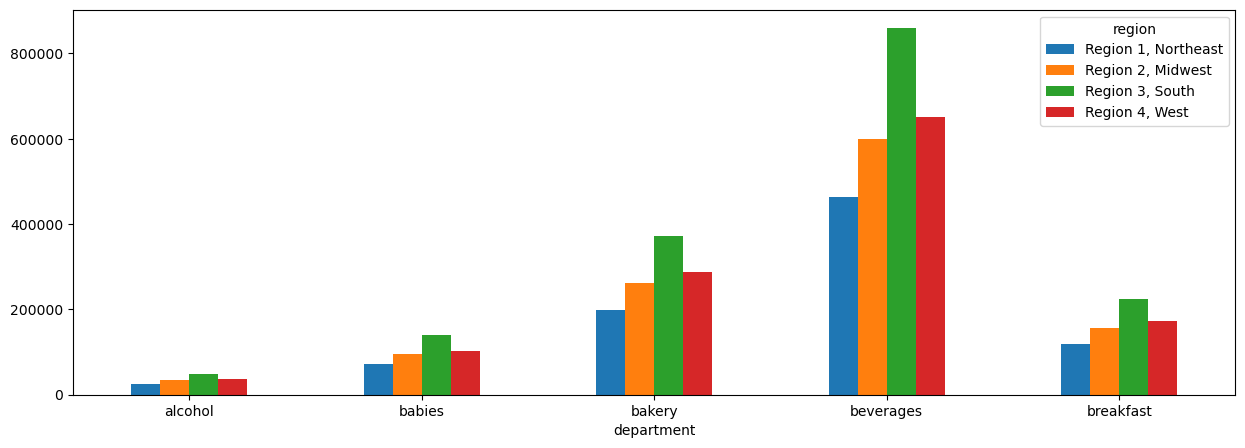

In [72]:
# Creating chart of 5 departments (in alphabetical order) based on the crosstab
department_region =crosstab_dept.sort_values('department').head(5).plot.bar(rot=0,figsize=(15,5))

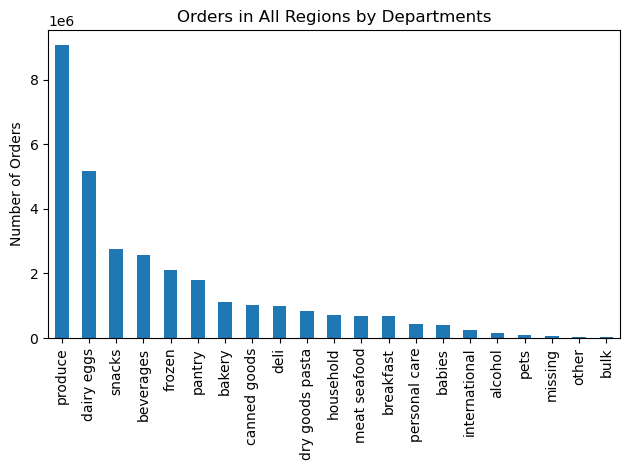

In [73]:
# Analyzing popularity of products
popularity_products = merge_data['department'].value_counts().plot.bar(legend=None, fontsize=10)
plt.ylabel('Number of Orders')
plt.title('Orders in All Regions by Departments')
plt.tight_layout()


In [74]:
# Exporting visualization
popularity_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','popularity of products.png'))

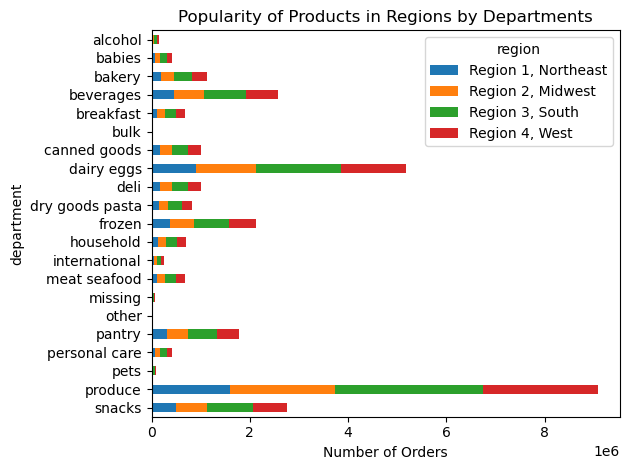

In [75]:
# Creating a stacked chart: number of orders vs department in regions
bar_department_region = crosstab_dept.sort_values(by='department', ascending=False).plot.barh(stacked = True)
plt.title('Popularity of Products in Regions by Departments')
plt.xlabel('Number of Orders')
plt.tight_layout()

In [76]:
# Exporting visualization
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region popularity department.png'))

In [77]:
# Create a crosstab between region and age_category
crosstab_age = pd.crosstab(merge_data['region'], merge_data['age_category'], dropna = False)

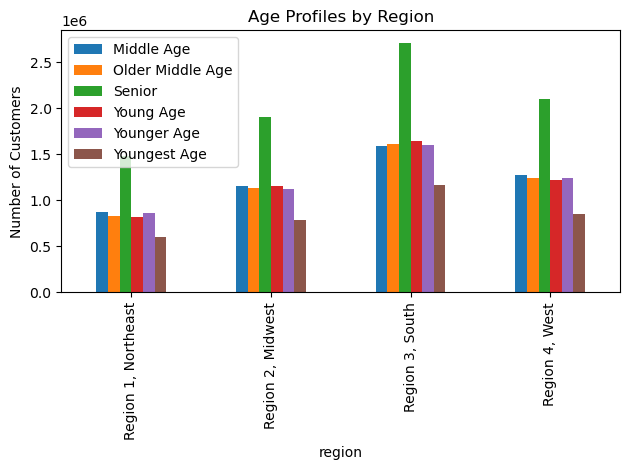

In [78]:
crosstab_age_bar = crosstab_age.plot(kind ='bar', stacked = False)
plt.title('Age Profiles by Region')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [79]:
# Exporting visualization
crosstab_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region age profiles.png'))

In [80]:
# Creating a crosstab between department and age_category
crosstab_age_2 = pd.crosstab(merge_data['department'], merge_data['age_category'], dropna = False)

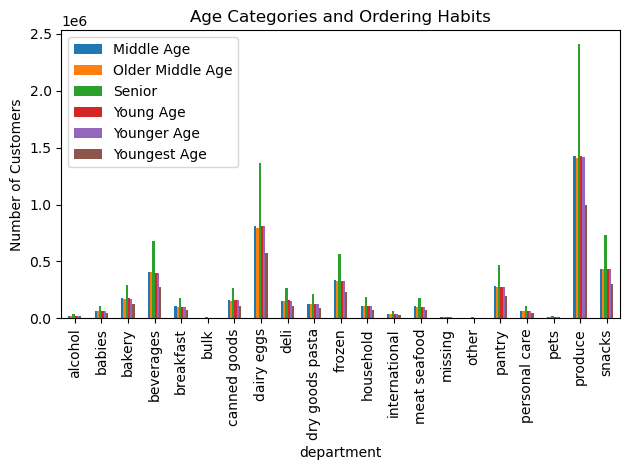

In [81]:
crosstab_age_22 = crosstab_age_2.plot(kind ='bar', stacked = False)
plt.title('Age Categories and Ordering Habits')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [82]:
# Exporting visualization
crosstab_age_22.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','department age profiles.png'))

In [83]:
# Creating a crosstab between region and income_category
crosstab_income_1 = pd.crosstab(merge_data['region'], merge_data['income_category'], dropna = False)

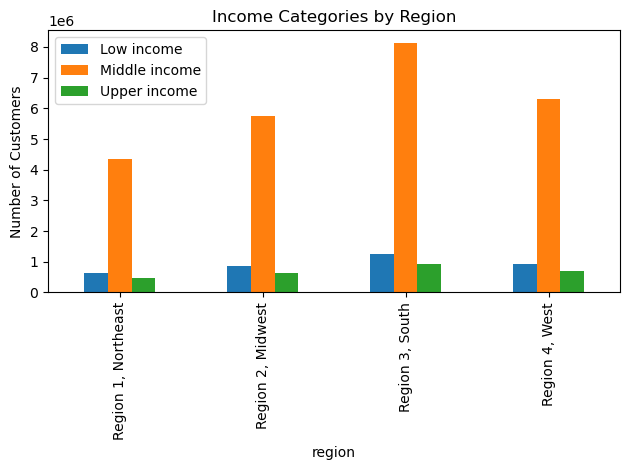

In [84]:
crosstab_income_2 = crosstab_income_1.plot(kind ='bar', stacked = False)
plt.title('Income Categories by Region')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [85]:
# Exporting visualization
crosstab_income_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region income profiles.png'))

In [86]:
# Creating a crosstab between department and income_category
crosstab_income_3 = pd.crosstab(merge_data['department'], merge_data['income_category'], dropna = False)

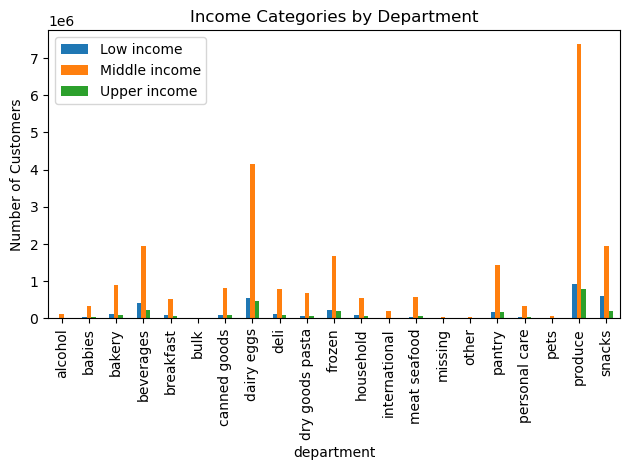

In [87]:
crosstab_income_4 = crosstab_income_3.plot(kind ='bar', stacked = False)
plt.title('Income Categories by Department')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [88]:
# Exporting visualization
crosstab_income_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','department income profiles.png'))

In [89]:
# Creating a crosstab between region and time_of_day
crosstab_time_5 = pd.crosstab(merge_data['region'], merge_data['time_of_day'], dropna = False)

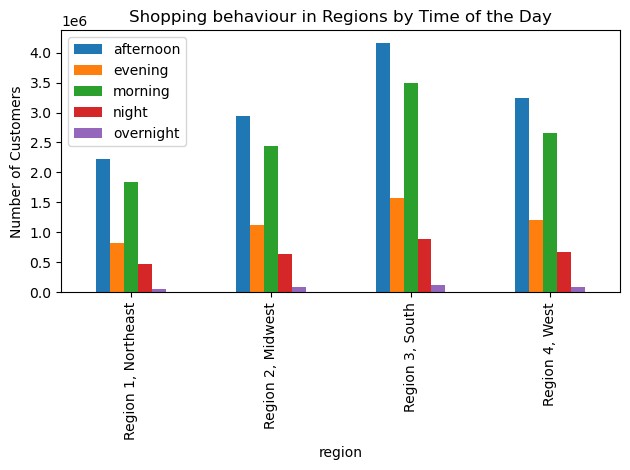

In [90]:
crosstab_time_6 = crosstab_time_5.plot(kind ='bar', stacked = False)
plt.title('Shopping behaviour in Regions by Time of the Day')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [91]:
# Exporting visualization
crosstab_time_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region time profiles.png'))

In [92]:
# Creating a crosstab between department and time_of_day
crosstab_time_7 = pd.crosstab(merge_data['department'], merge_data['time_of_day'], dropna = False)

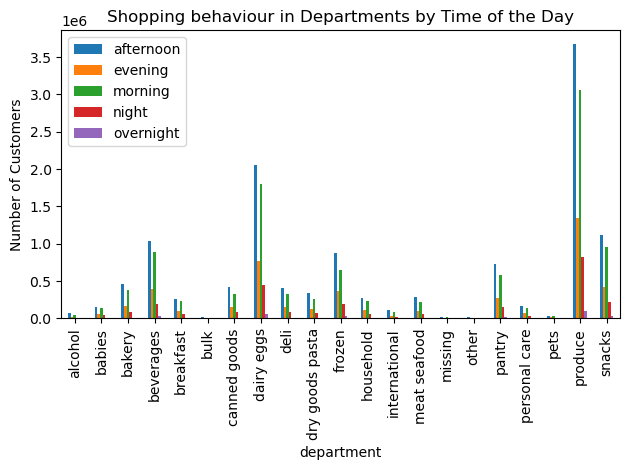

In [93]:
crosstab_time_8 = crosstab_time_7.plot(kind ='bar', stacked = False)
plt.title('Shopping behaviour in Departments by Time of the Day')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [94]:
crosstab_time_7.head()

time_of_day,afternoon,evening,morning,night,overnight
department,,,,,
alcohol,67625,25051,43272,7110,1151
babies,156399,56047,146626,45235,3768
bakery,459032,172626,378160,91669,12383
beverages,1034713,398041,895348,195579,31568
breakfast,261612,100894,239485,58321,7412


In [95]:
# Exporting visualization
crosstab_time_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','department time profiles.png'))

In [96]:
#FURTHER

In [97]:
# Aggregating column prices by column order_hour_of_day to find out particular times of the day when people spend the most money
spending = merge_data.groupby('order_hour_of_day').agg({'prices':['sum']})
spending = spending.sort_values(by=('prices','sum'), ascending= False)
spending

,prices
,sum
order_hour_of_day,
10,20528455.6
11,20315890.7
14,20033866.0
15,19792064.6
13,19786375.3
12,19440011.5
16,18829422.4
9,18320620.1


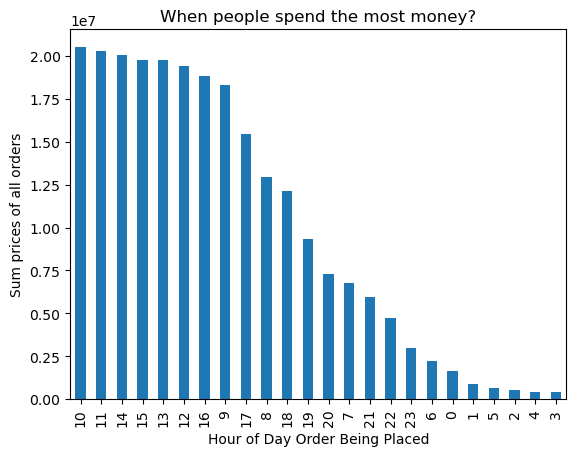

In [98]:
# Creating a bar chart with particular times of the day when people spend the most money
spending_bar = spending.plot.bar(legend=None)
plt.title('When people spend the most money?')
plt.xlabel('Hour of Day Order Being Placed')
plt.ylabel('Sum prices of all orders')
plt.show()

In [99]:
# Exporting visualization
spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'times of the day when spend most money.png'))

In [100]:
# Analyzing which department have the highest frequency of product orders
merge_data['price_range_loc'].value_counts()

Mid-range product     20892852
Low-range product      9674881
High-range product      397953
Name: price_range_loc, dtype: int64

Text(0.5, 1.0, 'Price Range of Products')

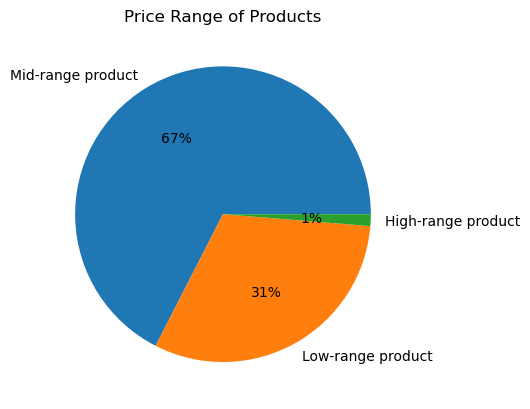

In [101]:
# Visualizing the price_range_loc
price_range_pie = merge_data['price_range_loc'].value_counts().plot.pie(label='', autopct = ('%1.f%%'))
plt.title('Price Range of Products')

In [102]:
# Exporting visualization
price_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range.png'))

In [103]:
# Analyzing if there are certain types of products that are more popular than others in departments
merge_data[['department','product_name']].groupby(['department'])['product_name'].describe().sort_values(by='freq', ascending=False)

,count,unique,top,freq
department,,,,
produce,9079273,1684,Banana,453164
dairy eggs,5177182,3442,Organic Whole Milk,133514
beverages,2571901,4360,Sparkling Water Grapefruit,72669
deli,1003834,1320,Original Hummus,68545
bakery,1120828,1515,100% Whole Wheat Bread,58113
frozen,2121731,4005,Blueberries,53136
pantry,1782705,5364,Extra Virgin Olive Oil,48142
meat seafood,674781,906,Boneless Skinless Chicken Breasts,47755
canned goods,1012074,2091,Organic Black Beans,36503


Text(0.5, 1.0, 'Products with the highest frequency of orders')

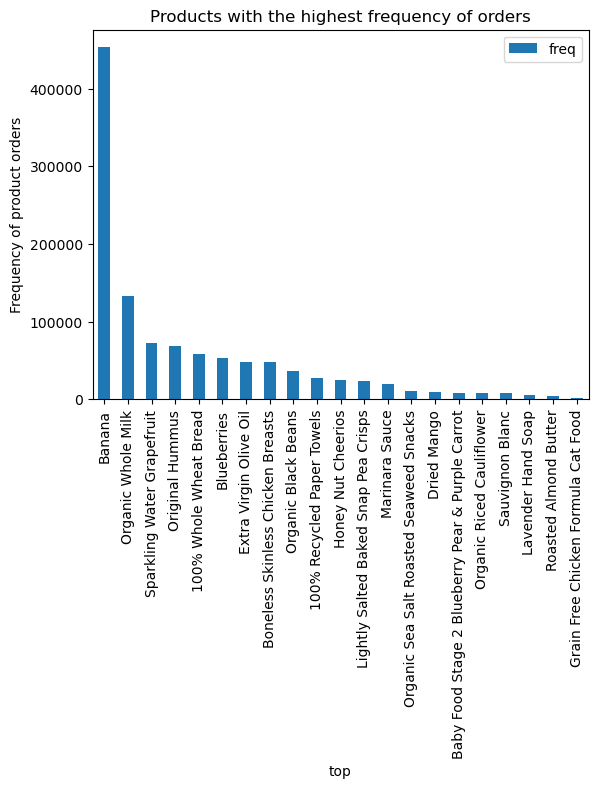

In [104]:
# Creating a visualization of the popular products 
pop_products = merge_data[['department','product_name']].groupby(['department'])['product_name'].describe().sort_values(by='freq', ascending=False).plot.bar(x='top', y='freq')
plt.ylabel('Frequency of product orders')
plt.title('Products with the highest frequency of orders')

In [105]:
# Exporting visualization
pop_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pop products in dept.png'))

Text(0.5, 1.0, 'Loyalty Groups by Max Order')

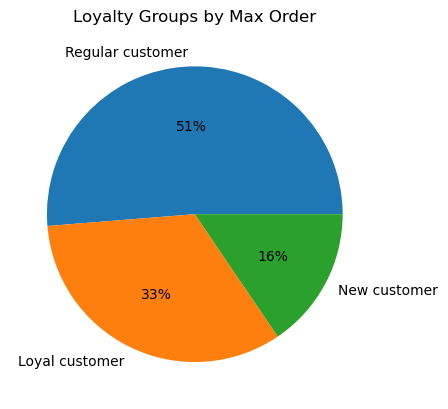

In [106]:
# Analyzing loyalty groups by max order
loyalty_pie = merge_data['loyalty_flag'].value_counts().plot.pie(label='', autopct = ('%1.f%%'))
plt.title('Loyalty Groups by Max Order')

In [107]:
# Exporting visualization
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty max order.png'))

In [108]:
# Analyzing loyalty groups by days_since_prior_order
# Applying  aggregate function to find max, mean, min of loyalty groups per days_since_prior_order
merge_data.groupby('loyalty_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.026661  0.0  30.0
New customer                  17.598677  0.0  30.0
Regular customer              12.155147  0.0  30.0

Text(0, 0.5, 'Number of Orders')

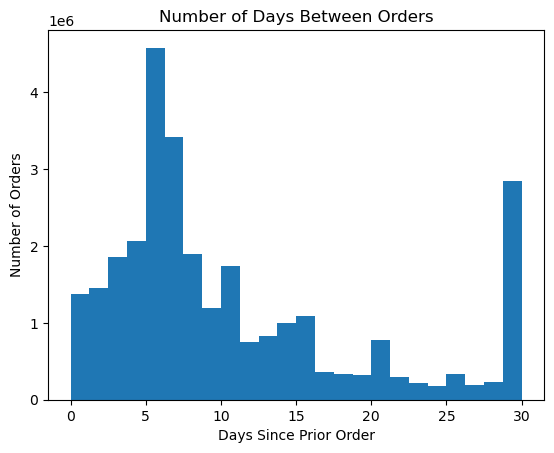

In [109]:
# Visualizing days_since_prior_order
hist_prio = merge_data['days_since_prior_order'].plot.hist(bins = 24,title ='Number of Days Between Orders', )
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')

In [110]:
# Exporting visualization
hist_prio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'days between orders.png'))

In [111]:
# Analyzing ordering habits based on customer´s region
# Creating crosstab between 'region' and frequency flag
crosstab_customer = pd.crosstab(merge_data['region'], merge_data['Customer_frequency'], dropna = False)

In [112]:
# Checking result
crosstab_customer 

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
region,,,
"Region 1, Northeast",3741094,496935,1226850
"Region 2, Midwest",4935462,690139,1636162
"Region 3, South",7074023,968063,2269445
"Region 4, West",5454459,740057,1732997


In [113]:
# Creating a crosstab with %
crosstab_customer_2 = pd.crosstab(merge_data['region'], merge_data['Customer_frequency'], normalize='index')\
       .round(4)*100

In [114]:
# Checking result
crosstab_customer_2 

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
region,,,
"Region 1, Northeast",68.46,9.09,22.45
"Region 2, Midwest",67.97,9.50,22.53
"Region 3, South",68.60,9.39,22.01
"Region 4, West",68.80,9.34,21.86


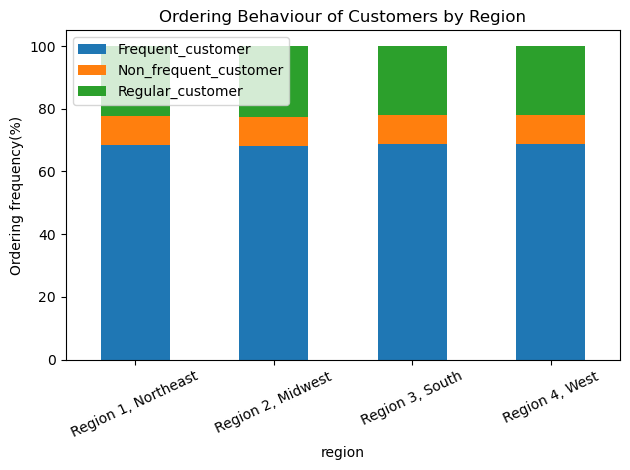

In [115]:
# Creating a bar chart 
region_frequency= crosstab_customer_2.plot(kind="bar", stacked=True, rot=25)
plt.legend(loc = 'upper left')
plt.title('Ordering Behaviour of Customers by Region')
plt.ylabel('Ordering frequency(%)')
plt.tight_layout()

In [116]:
# Exporting visualization
region_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order habits regions.png'))

In [117]:
# Analyzing family status and ordering habits, creating a crosstab between department and Family status
crosstab_family = pd.crosstab(merge_data['department'], merge_data['family_status'], dropna = False)

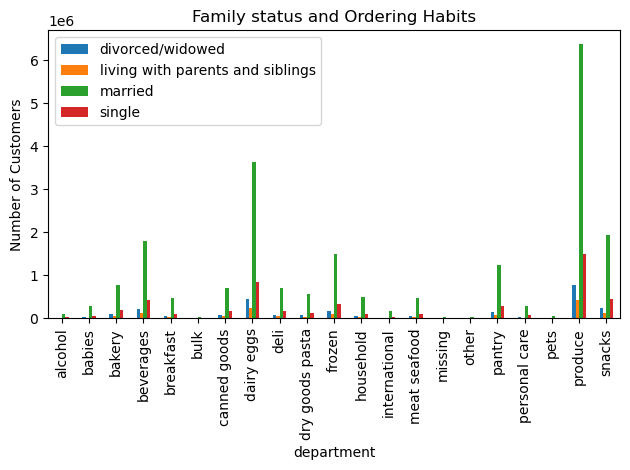

In [118]:
crosstab_family_1 = crosstab_family.plot(kind ='bar', stacked = False)
plt.title('Family status and Ordering Habits')
plt.ylabel('Number of Customers')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [119]:
# Exporting visualization
crosstab_family_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family orders.png'))

In [120]:
# Analyzing family status and ordering habits, creating a crosstab between Family status and income category
crosstab_f = pd.crosstab(merge_data['family_status'], merge_data['income_category'], normalize='index')\
       .round(4)*100

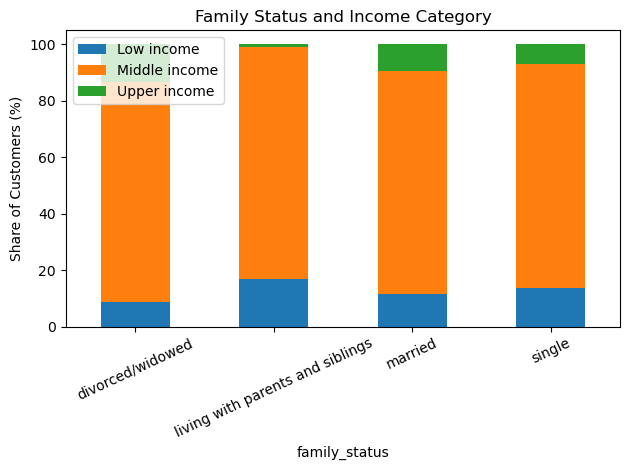

In [121]:
crosstab_family_inc = crosstab_f.plot(kind ='bar', stacked = True, rot=25)
plt.title('Family Status and Income Category')
plt.ylabel('Share of Customers (%)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [122]:
# Exporting visualization
crosstab_family_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family income.png'))

In [123]:
# Analyzing family status and ordering habits, creating a crosstab between Family status and age category
crosstab_fa = pd.crosstab(merge_data['family_status'], merge_data['age_category'], normalize='index')\
       .round(4)*100

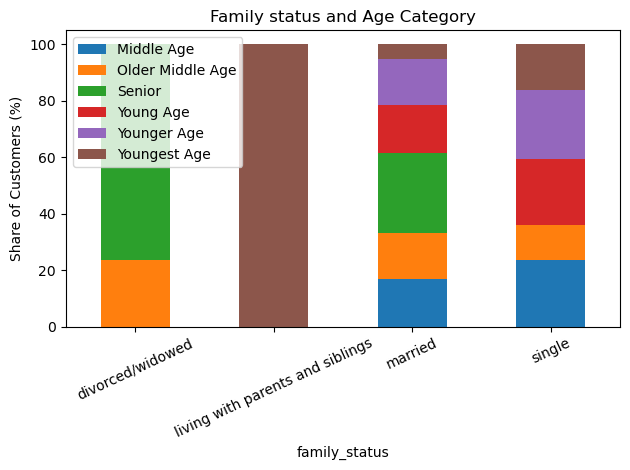

In [124]:
crosstab_family_age = crosstab_fa.plot(kind ='bar', stacked = True, rot=25)
plt.title('Family status and Age Category')
plt.ylabel('Share of Customers (%)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [125]:
# Exporting visualization
crosstab_family_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family income.png'))

In [126]:
# Creating a crosstab between department and time_of_day
crosstab_time_100 = pd.crosstab(merge_data['age_category'], merge_data['time_of_day'], normalize='index')\
       .round(4)*100

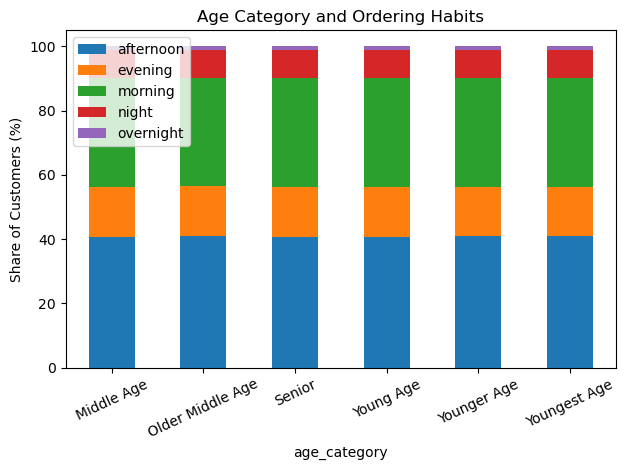

In [127]:
crosstab_family_2 = crosstab_time_100.plot(kind ='bar', stacked = True, rot=25)
plt.title('Age Category and Ordering Habits')
plt.ylabel('Share of Customers (%)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [128]:
# Exporting visualization
crosstab_family_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age ordering.png'))

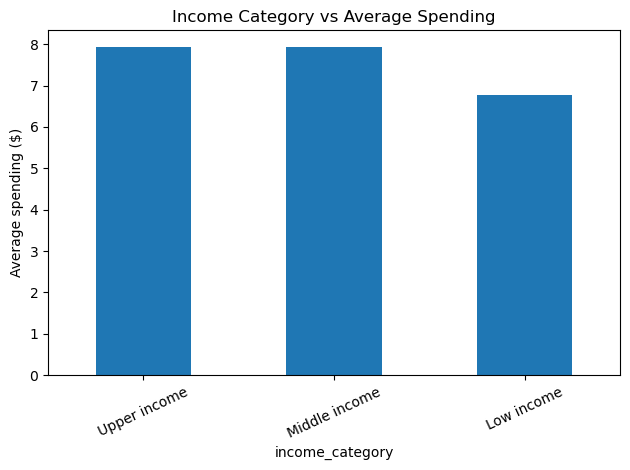

In [129]:
# Analyzing differences in ordering habits: income category vs average spending
ord_dif =merge_data.groupby('income_category')['prices'].mean().sort_values(ascending=False).plot.bar(rot=25)
plt.title('Income Category vs Average Spending')
plt.ylabel('Average spending ($)')
plt.tight_layout()
plt.show()

In [130]:
# Exporting visualization
ord_dif.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average spending.png'))

In [172]:
# Analyzing differences in ordering habits: family status vs meat_buyer
buyer_meat_dept = pd.crosstab(merge_data['meat_buyer'], merge_data['family_status'], dropna = False)

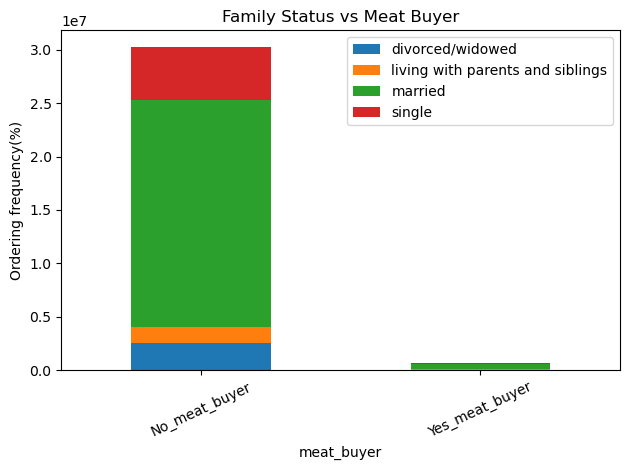

In [173]:
# Creating a bar chart 
buyer_meat_dept_viz = buyer_meat_dept.plot(kind="bar", stacked=True, rot=25)
plt.legend(loc = 'upper right')
plt.title('Family Status vs Meat Buyer')
plt.ylabel('Ordering frequency(%)')
plt.tight_layout()

In [174]:
# Exporting visualization
buyer_meat_dept_viz .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam stat meat buyer.png'))

In [168]:
# Analyzing differences in ordering habits: income category vs meat_buyer
buyer_meat_dept_1 = pd.crosstab(merge_data['meat_buyer'], merge_data['income_category'], dropna = False)

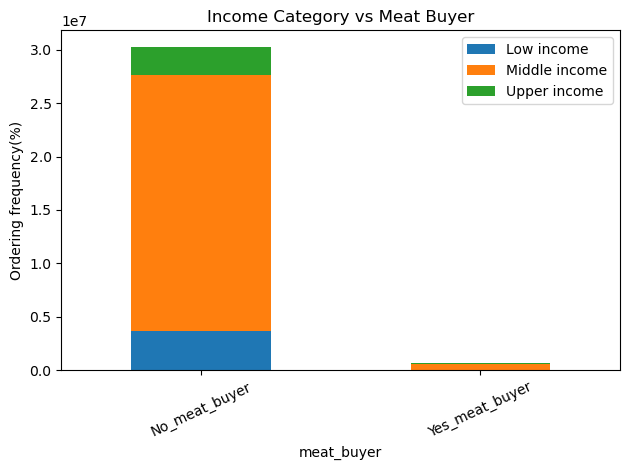

In [169]:
# Creating a bar chart 
buyer_meat_dept_viz_1 = buyer_meat_dept.plot(kind="bar", stacked=True, rot=25)
plt.legend(loc = 'upper right')
plt.title('Income Category vs Meat Buyer')
plt.ylabel('Ordering frequency(%)')
plt.tight_layout()

In [175]:
# Customers placing orders in meat seafood department belong mostly to middle income category.

In [170]:
# Exporting visualization
buyer_meat_dept_viz_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc stat meat buyer.png'))

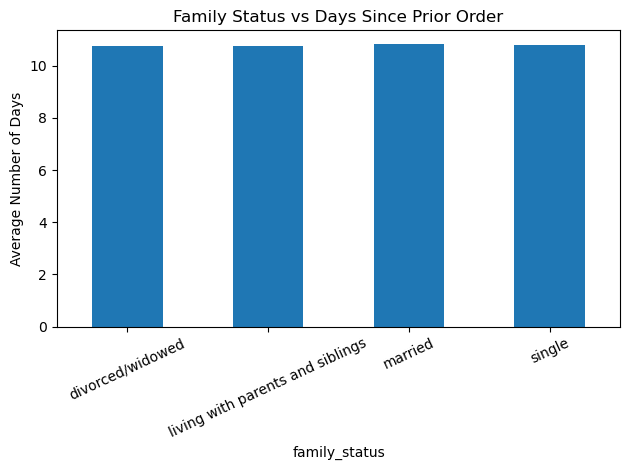

In [141]:
# Analyzing differences in ordering habits: Family Status vs Days since prior order
ord_prio = merge_data[['days_since_prior_order','family_status']].groupby(['family_status'])['days_since_prior_order'].mean().plot.bar(rot=25)
plt.title('Family Status vs Days Since Prior Order')
plt.ylabel('Average Number of Days')
plt.tight_layout()
plt.show()

In [142]:
# Exporting visualization
ord_prio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average spending.png'))